In [13]:
library("tximport")
library("readr")
library("DESeq2")
library("ggplot2")
library("pheatmap")
library("RColorBrewer")
library("biomaRt")
library("tidyverse")
library("pcaExplorer")
library('exprAnalysis')
library('org.Hs.eg.db')

Loading required package: AnnotationDbi

Attaching package: 'AnnotationDbi'

The following object is masked from 'package:dplyr':

    select




In [2]:
dir <- "first/"
samples <- read_tsv(file.path(dir, "samples.txt"))
files <- file.path(dir, samples$files.name, paste0(samples$files.name, ".genes.results"))
names(files) <- paste0(samples$files.name)

Parsed with column specification:
cols(
  files.name = col_character(),
  condition = col_character(),
  sample = col_character()
)


In [8]:
modify_csv <- function(files.list) {
  for (i in files.list) {
    tmp <- read_tsv(i)
    tmp$effective_length[tmp$effective_length==0] <- 1
    write_tsv(tmp, i)
  }
}
modify_csv(files.list = files)

Parsed with column specification:
cols(
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_double(),
  effective_length = col_double(),
  expected_count = col_double(),
  TPM = col_double(),
  FPKM = col_double()
)
Parsed with column specification:
cols(
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_double(),
  effective_length = col_double(),
  expected_count = col_double(),
  TPM = col_double(),
  FPKM = col_double()
)
Parsed with column specification:
cols(
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_double(),
  effective_length = col_double(),
  expected_count = col_double(),
  TPM = col_double(),
  FPKM = col_double()
)
Parsed with column specification:
cols(
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_double(),
  effective_length = col_double(),
  expected_count = col_double(),
  TPM = col_double(),
  FPKM = col_double()
)
Parsed w

In [3]:
txi.rsem <- tximport(files, type = "rsem")

condition <- factor(samples$condition)

coldata <- data.frame(samples = samples$sample, condition=condition)

rownames(coldata) <- names(files)

ddsTxi <- DESeqDataSetFromTximport(txi.rsem, colData = coldata, design = ~condition + samples)

dds <- ddsTxi[ rowSums(counts(ddsTxi)) > 1, ]

dds$condition <-factor(dds$condition, levels=c("before", "after"))

dds <- DESeq(dds)
res <- results(dds, pAdjustMethod = "fdr", contrast=c("condition","after", "before"))

reading in files with read_tsv
1 2 3 4 5 6 
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


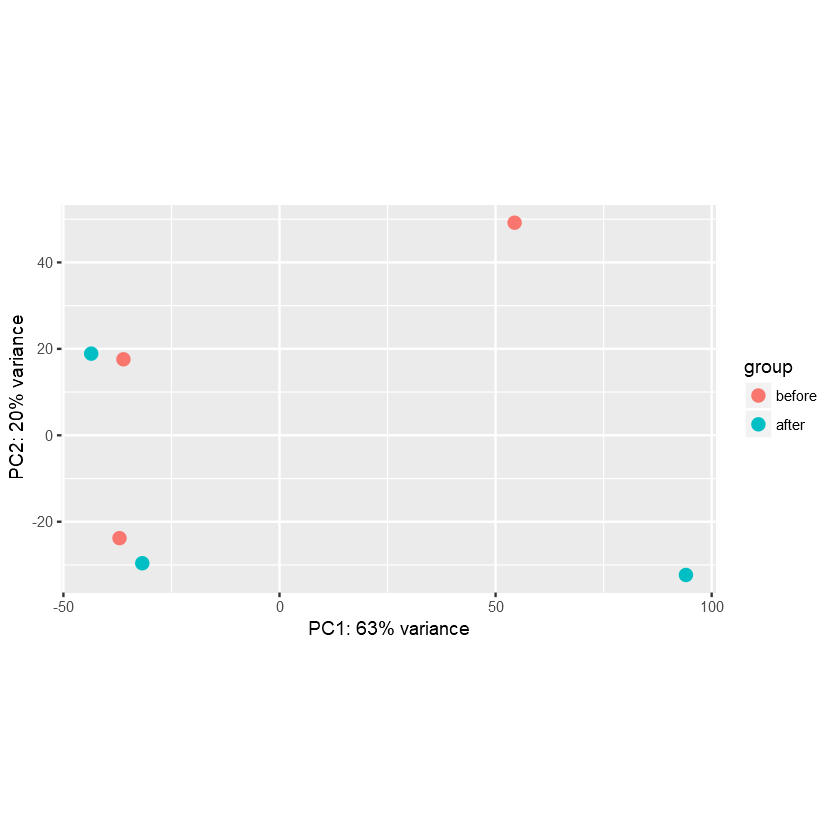

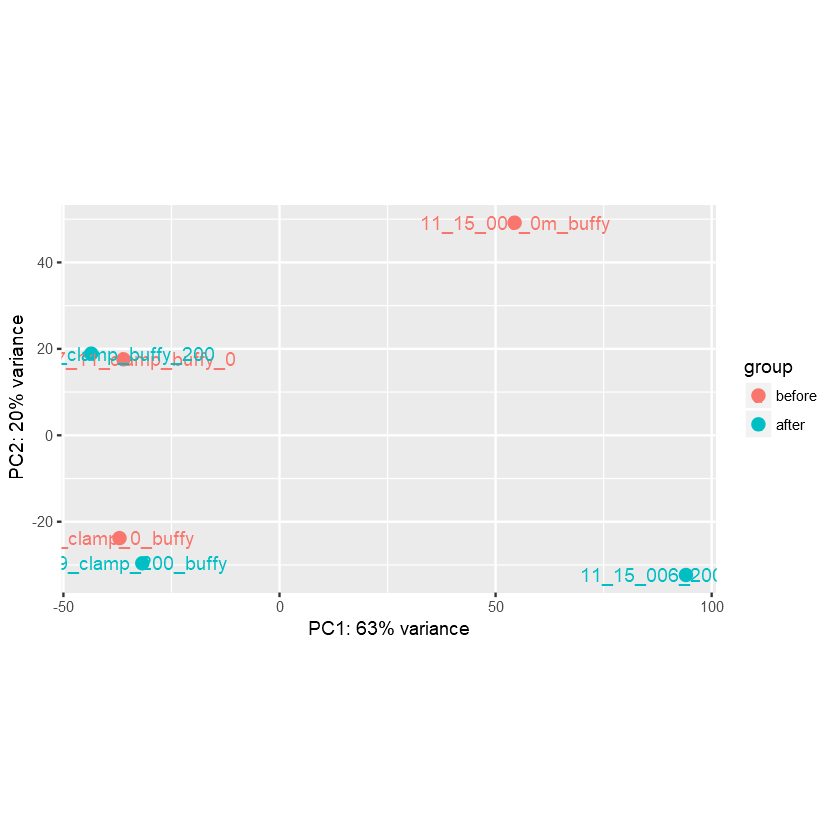

In [16]:
resLFC <- lfcShrink(dds, coef=2, res=res)
resOrdered <- res[order(res$pvalue),]


rld <- rlog(dds, blind=FALSE)
vsd <- varianceStabilizingTransformation(dds, blind=FALSE)

sampleDists <- dist(t(assay(rld)))
z <- plotPCA(rld, intgroup=c("condition"))
plotPCA(rld, intgroup=c("condition"))
z + geom_text(aes_string(x="PC1", y="PC2", label="name"))

In [4]:
resul <- res[order(res$padj),]

resul$sig <- ifelse(resul$pvalue < 0.05, "P-value<0.05", "Not Sig")

resul <- as.data.frame(resul)
head(resul, 15)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig
ENSG00000241670,184.05735,-8.224287,1.5099489,-5.446732,5.130365e-08,0.0008174210,P-value<0.05
ENSG00000237198,97.64726,8.792390,1.6552961,5.311672,1.086239e-07,0.0008653526,P-value<0.05
ENSG00000270375,16780.67213,3.662321,0.7231299,5.064540,4.093874e-07,0.0021742566,P-value<0.05
ENSG00000144460,115.10394,4.492508,0.9618233,4.670825,2.999925e-06,0.0095748251,P-value<0.05
ENSG00000230178,115.01179,7.985025,1.7355336,4.600905,4.206601e-06,0.0095748251,P-value<0.05
ENSG00000231649,453.89773,2.761279,0.5980519,4.617123,3.890975e-06,0.0095748251,P-value<0.05
ENSG00000235249,115.01179,7.985025,1.7355336,4.600905,4.206601e-06,0.0095748251,P-value<0.05
ENSG00000261794,385.88922,-5.679482,1.2745000,-4.456243,8.340841e-06,0.0166118278,P-value<0.05
ENSG00000213999,91.64384,5.035291,1.1393964,4.419262,9.903855e-06,0.0175331244,P-value<0.05
ENSG00000179304,686.56305,-1.584316,0.3646598,-4.344642,1.395027e-05,0.0215632752,P-value<0.05


Saving 6.67 x 6.67 in image


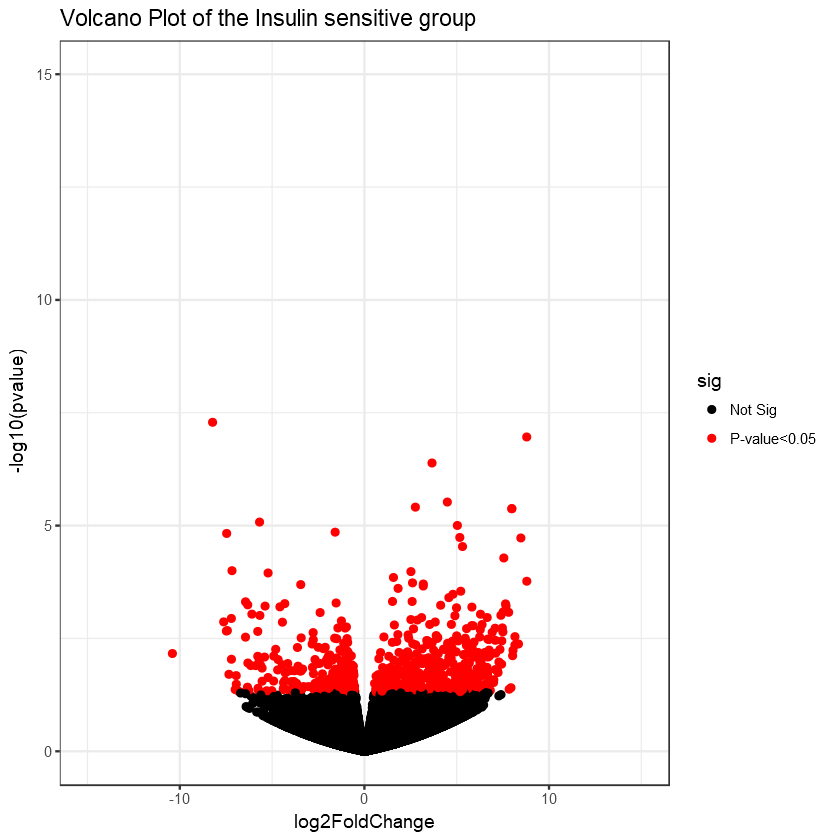

In [9]:
DEgenes_DESeq <- resul[which(abs(resul$log2FoldChange) >= log2(2) & resul$pvalue < 0.05),]

p <- ggplot2::ggplot(resul, ggplot2::aes(log2FoldChange, -log10(pvalue))) +
  ggplot2::geom_point(ggplot2::aes(col = sig)) +
  ggplot2::scale_color_manual(values = c("black", "red")) +
  ggplot2::ggtitle("Volcano Plot of the Insulin sensitive group") + ggplot2::theme_bw() + ggplot2::ylim(0,15) + ggplot2::xlim(-15,15)

print(p)
ggsave("Insulin-sensitive-group.volcano.plot.png", device = "png")
#p + ggrepel::geom_text_repel(data=resul[1:10, ], ggplot2::aes(label=rownames(resul[1:10, ])))

In [10]:
head(DEgenes_DESeq)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig
ENSG00000241670,184.05735,-8.224287,1.5099489,-5.446732,5.130365e-08,0.0008174210,P-value<0.05
ENSG00000237198,97.64726,8.792390,1.6552961,5.311672,1.086239e-07,0.0008653526,P-value<0.05
ENSG00000270375,16780.67213,3.662321,0.7231299,5.064540,4.093874e-07,0.0021742566,P-value<0.05
ENSG00000144460,115.10394,4.492508,0.9618233,4.670825,2.999925e-06,0.0095748251,P-value<0.05
ENSG00000230178,115.01179,7.985025,1.7355336,4.600905,4.206601e-06,0.0095748251,P-value<0.05
ENSG00000231649,453.89773,2.761279,0.5980519,4.617123,3.890975e-06,0.0095748251,P-value<0.05


In [11]:
deseq.result <- as.data.frame(DEgenes_DESeq)
head(deseq.result)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig
ENSG00000241670,184.05735,-8.224287,1.5099489,-5.446732,5.130365e-08,0.0008174210,P-value<0.05
ENSG00000237198,97.64726,8.792390,1.6552961,5.311672,1.086239e-07,0.0008653526,P-value<0.05
ENSG00000270375,16780.67213,3.662321,0.7231299,5.064540,4.093874e-07,0.0021742566,P-value<0.05
ENSG00000144460,115.10394,4.492508,0.9618233,4.670825,2.999925e-06,0.0095748251,P-value<0.05
ENSG00000230178,115.01179,7.985025,1.7355336,4.600905,4.206601e-06,0.0095748251,P-value<0.05
ENSG00000231649,453.89773,2.761279,0.5980519,4.617123,3.890975e-06,0.0095748251,P-value<0.05


In [14]:
reults.anno <- geneAnnotations(input=deseq.result, 
                               keys=row.names(deseq.result), 
                               column=c("ENTREZID", "SYMBOL"), 
                               keytype="ENSEMBL", organism="human")

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


In [32]:
head(reults.anno)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,ENTREZID,SYMBOL
ENSG00000241670,184.05735,-8.224287,1.5099489,-5.446732,5.130365e-08,0.0008174210,P-value<0.05,NA,NA
ENSG00000237198,97.64726,8.792390,1.6552961,5.311672,1.086239e-07,0.0008653526,P-value<0.05,NA,NA
ENSG00000270375,16780.67213,3.662321,0.7231299,5.064540,4.093874e-07,0.0021742566,P-value<0.05,NA,NA
ENSG00000144460,115.10394,4.492508,0.9618233,4.670825,2.999925e-06,0.0095748251,P-value<0.05,57624,NYAP2
ENSG00000230178,115.01179,7.985025,1.7355336,4.600905,4.206601e-06,0.0095748251,P-value<0.05,26683,OR4F3
ENSG00000231649,453.89773,2.761279,0.5980519,4.617123,3.890975e-06,0.0095748251,P-value<0.05,NA,NA


In [15]:
OrgDb <- org.Hs.eg.db # can also be other organisms

geneList <- as.vector(reults.anno$log2FoldChange)
names(geneList) <- reults.anno$ENTREZID
gene <- na.omit(reults.anno$ENTREZID)


# Group GO
gbp <- clusterProfiler::groupGO(gene     = gene,
                                OrgDb    = OrgDb,
                                ont      = "BP",
                                level    = 3,
                                readable = TRUE)
head(summary(gbp)[,-5])

Loading required package: DOSE
DOSE v3.4.0  For help: https://guangchuangyu.github.io/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609

Warning message in summary(gbp):
"summary method to convert the object to data.frame is deprecated, please use as.data.frame instead."

,ID,Description,Count,GeneRatio
GO:0019953,GO:0019953,sexual reproduction,15,15/478
GO:0019954,GO:0019954,asexual reproduction,0,0/478
GO:0022414,GO:0022414,reproductive process,37,37/478
GO:0032504,GO:0032504,multicellular organism reproduction,17,17/478
GO:0032505,GO:0032505,reproduction of a single-celled organism,0,0/478
GO:0061887,GO:0061887,reproduction of symbiont in host,0,0/478


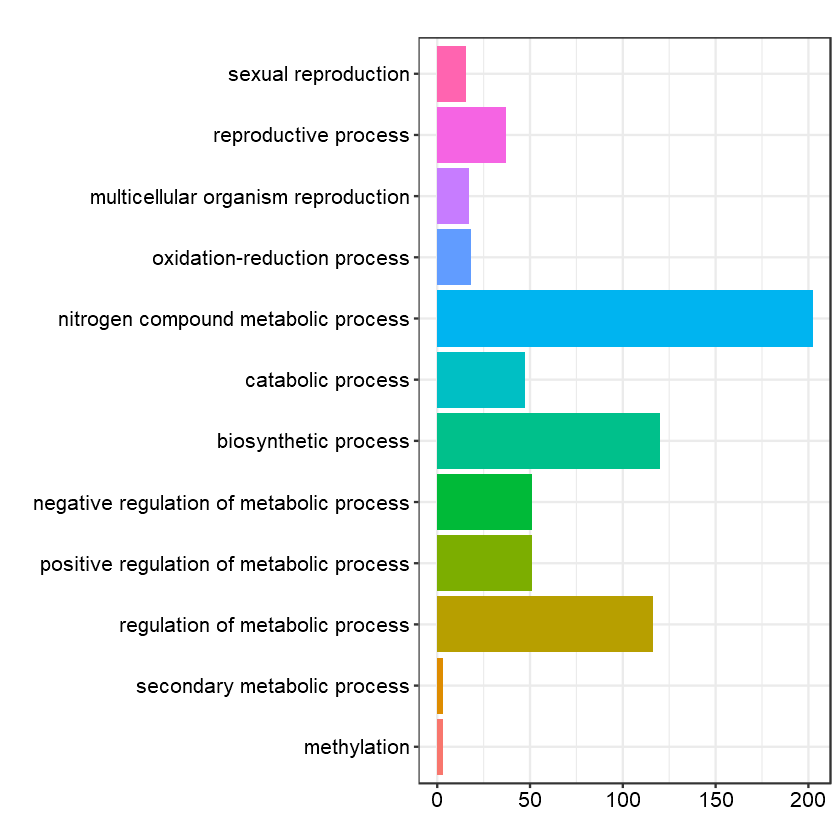

In [17]:
barplot(gbp, drop=TRUE, showCategory=12, xlab=600)

In [27]:
tmp <- as.data.frame(gbp)
head(tmp)
write.csv(tmp, "group-go-insulin-sensitive.csv")

,ID,Description,Count,GeneRatio,geneID
GO:0019953,GO:0019953,sexual reproduction,15,15/478,TSPY3/SPATA31D1/SPATA31D3/CLDN11/ELL3/LHFPL2/INPP5B/BNC1/ADAMTS2/PKDREJ/PGAM2/NPAP1/SPIN2B/TSPY8/ZFP41
GO:0019954,GO:0019954,asexual reproduction,0,0/478,
GO:0022414,GO:0022414,reproductive process,37,37/478,TSPY3/SPATA31D1/THBD/MDFI/SPATA31D3/CLDN11/RAD54L/ELL3/GJA1/EME2/LHFPL2/IGFBP7/PDGFRA/GNRH1/INPP5B/BNC1/GATA6/PTCH1/STAG3/LRP6/ADAMTS2/OSM/WNT5A/TFCP2L1/FOSB/PKDREJ/NR5A1/STRA6/ADAM15/TERF1/PGAM2/C11orf80/IRX5/NPAP1/SPIN2B/TSPY8/ZFP41
GO:0032504,GO:0032504,multicellular organism reproduction,17,17/478,TSPY3/SPATA31D1/SPATA31D3/CLDN11/ELL3/GJA1/PDGFRA/GNRH1/INPP5B/BNC1/ADAMTS2/NR5A1/PGAM2/NPAP1/SPIN2B/TSPY8/ZFP41
GO:0032505,GO:0032505,reproduction of a single-celled organism,0,0/478,
GO:0061887,GO:0061887,reproduction of symbiont in host,0,0/478,


In [26]:
tmp %>% dplyr::filter(Description=="methylation")

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

ID,Description,Count,GeneRatio,geneID
GO:0032259,methylation,3,3/478,KMT5A/ECE2/SETD4


In [29]:
gcc <- clusterProfiler::groupGO(gene     = gene,
                                OrgDb    = OrgDb,
                                ont      = "CC",
                                level    = 3,
                                readable = TRUE)
head(summary(gcc)[,-5])

Warning message in summary(gcc):
"summary method to convert the object to data.frame is deprecated, please use as.data.frame instead."

,ID,Description,Count,GeneRatio
GO:0005886,GO:0005886,plasma membrane,134,134/478
GO:0005628,GO:0005628,prospore membrane,0,0/478
GO:0005789,GO:0005789,endoplasmic reticulum membrane,17,17/478
GO:0019867,GO:0019867,outer membrane,5,5/478
GO:0031090,GO:0031090,organelle membrane,52,52/478
GO:0034357,GO:0034357,photosynthetic membrane,0,0/478


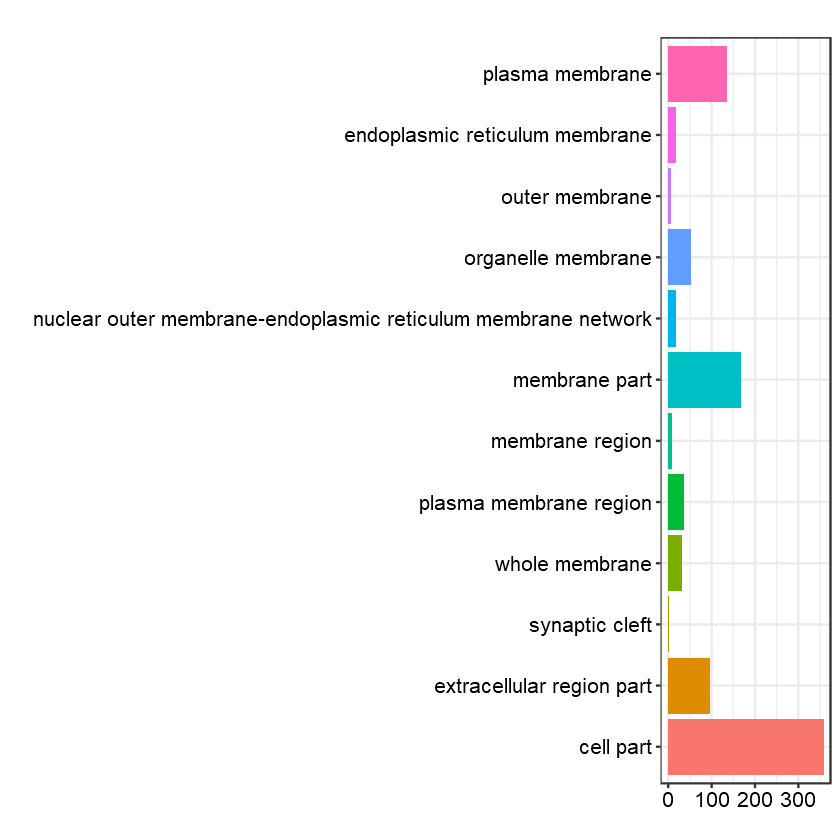

In [30]:
barplot(gcc, drop=TRUE, showCategory=12)

In [31]:
tmp.cc <- as.data.frame(gcc)
write.csv(tmp.cc, "Go-cc-insulin-sensitive.csv")

In [35]:
gmf <- clusterProfiler::groupGO(gene     = gene,
                                OrgDb    = OrgDb,
                                ont      = "MF",
                                level    = 3,
                                readable = TRUE)
head(summary(gmf)[,-5])

Warning message in summary(gmf):
"summary method to convert the object to data.frame is deprecated, please use as.data.frame instead."

,ID,Description,Count,GeneRatio
GO:0004133,GO:0004133,glycogen debranching enzyme activity,0,0/478
GO:0016491,GO:0016491,oxidoreductase activity,14,14/478
GO:0008987,GO:0008987,quinolinate synthetase A activity,0,0/478
GO:0009975,GO:0009975,cyclase activity,0,0/478
GO:0010280,GO:0010280,UDP-L-rhamnose synthase activity,0,0/478
GO:0016740,GO:0016740,transferase activity,46,46/478


In [36]:
tmp.mf <- as.data.frame(gmf)
write.csv(tmp.mf, "Go-mf-insulin-sensitive.csv")

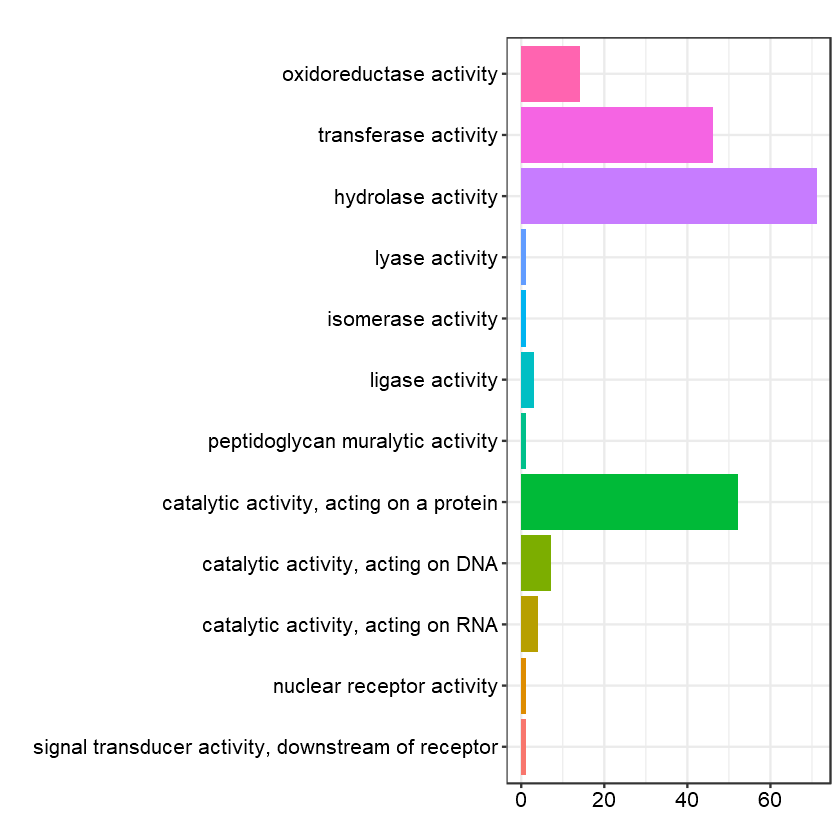

In [37]:
barplot(gmf, drop=TRUE, showCategory=12)

In [41]:
ego.cc <- clusterProfiler::enrichGO(gene          = gene,
                                 OrgDb         = OrgDb,
                                 ont           = "CC",
                                 pvalueCutoff  = 0.1,
                                 qvalueCutoff = 0.1,
                                 readable      = TRUE)
head(summary(ego.cc)[,-8])

Warning message in summary(ego.cc):
"summary method to convert the object to data.frame is deprecated, please use as.data.frame instead."

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue


In [42]:
head(ego.cc)

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,Count


In [55]:
ego.bp <- clusterProfiler::enrichGO(gene          = gene,
                                 OrgDb         = OrgDb,
                                 ont           = "BP",
                                 pvalueCutoff  = 0.05, 
                                 readable      = TRUE)
head(summary(ego.bp)[,-8])

Warning message in summary(ego):
"summary method to convert the object to data.frame is deprecated, please use as.data.frame instead."

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,Count
GO:0048704,GO:0048704,embryonic skeletal system morphogenesis,11/377,93/17381,5.364901e-06,0.01818165,0.01766464,11
GO:0048706,GO:0048706,embryonic skeletal system development,12/377,122/17381,1.385089e-05,0.02347032,0.02280293,12
GO:0044243,GO:0044243,multicellular organismal catabolic process,9/377,76/17381,3.820053e-05,0.04156683,0.04038485,9
GO:0048562,GO:0048562,embryonic organ morphogenesis,18/377,283/17381,4.906088e-05,0.04156683,0.04038485,18


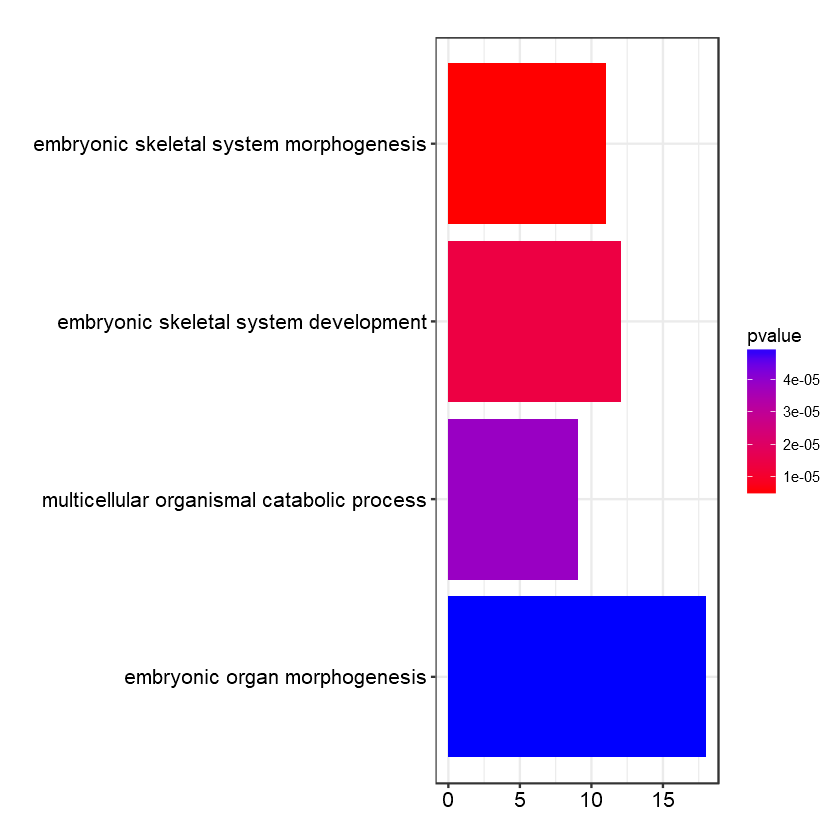

In [70]:
barplot(ego.bp, showCategory=25)

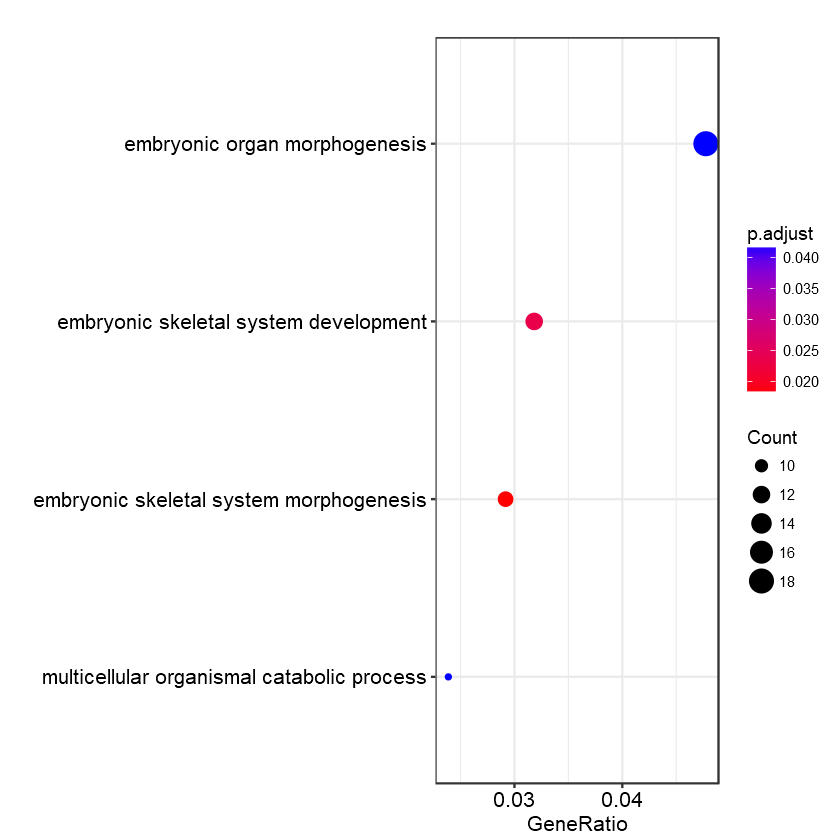

In [71]:
clusterProfiler::dotplot(ego.bp, showCategory=25)

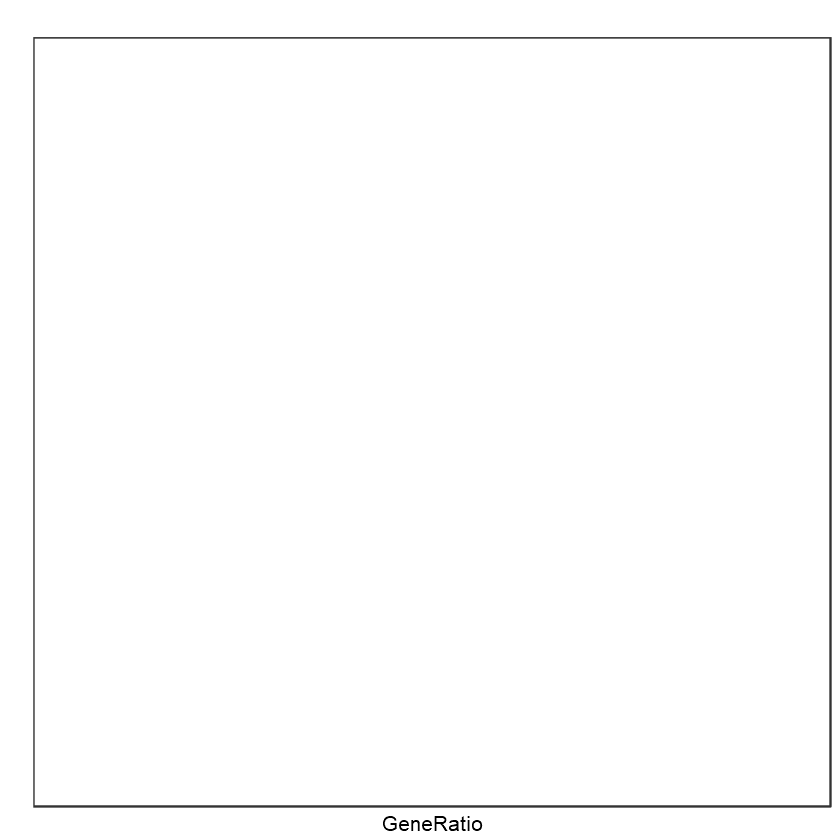

In [62]:
clusterProfiler::dotplot(ego.cc, showCategory=25)

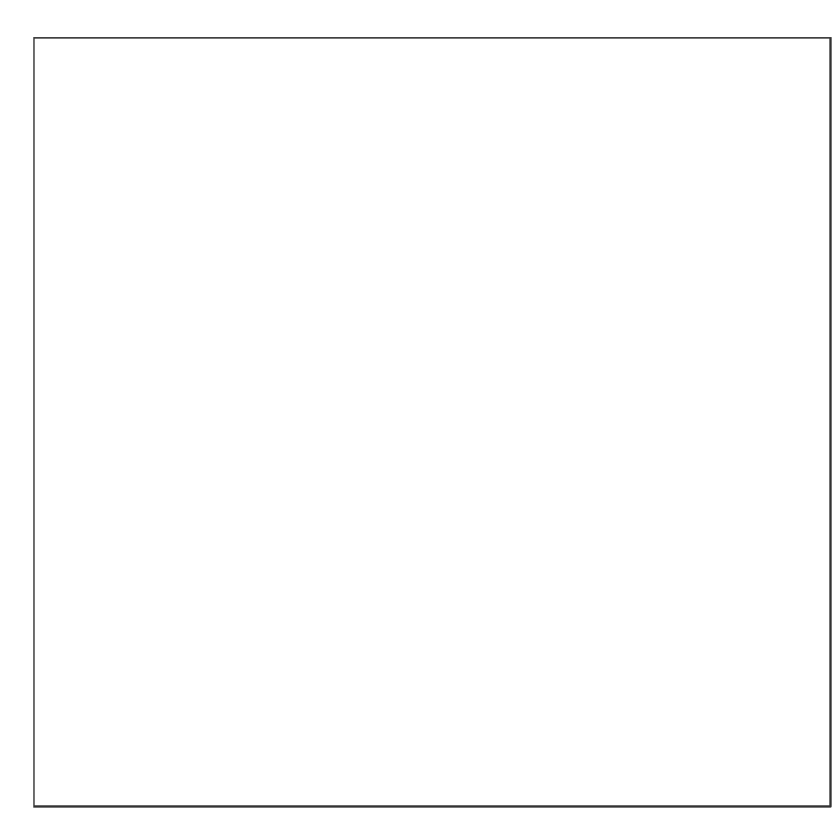

In [61]:
barplot(ego.cc, showCategory=25)

In [66]:
ego.mf <- clusterProfiler::enrichGO(gene          = gene,
                                 OrgDb         = OrgDb,
                                 ont           = "MF",
                                 pvalueCutoff  = 0.1, 
                                 readable      = TRUE)
head(summary(ego.mf)[,-8])

Warning message in summary(ego.mf):
"summary method to convert the object to data.frame is deprecated, please use as.data.frame instead."

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue


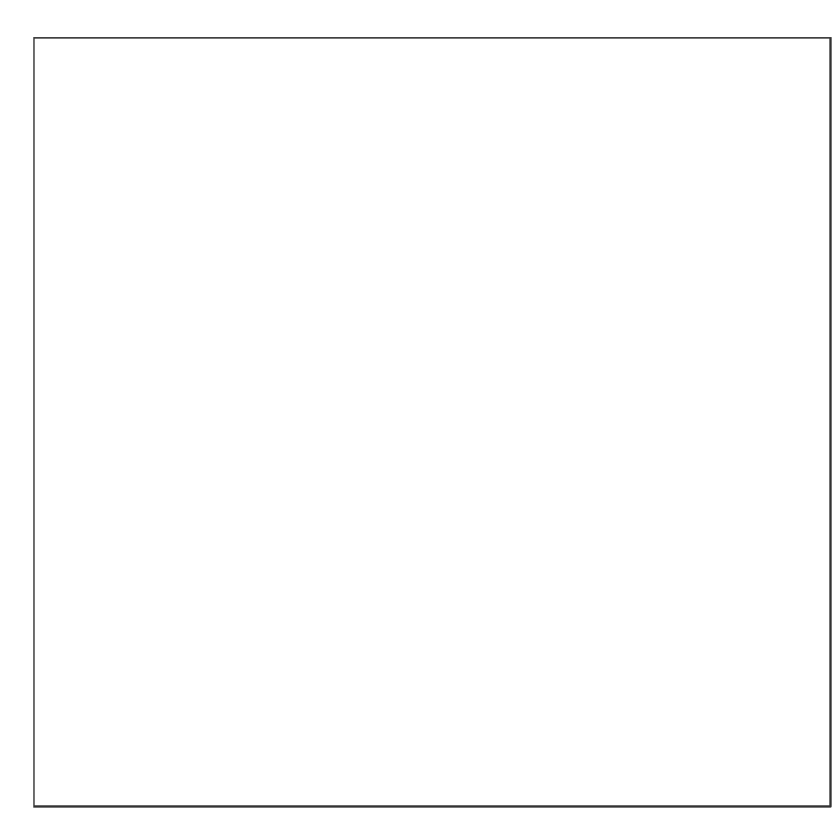

In [67]:
barplot(ego.mf, showCategory=25)

In [ ]:
clusterProfiler::dotplot(ego.mf, showCategory=25)

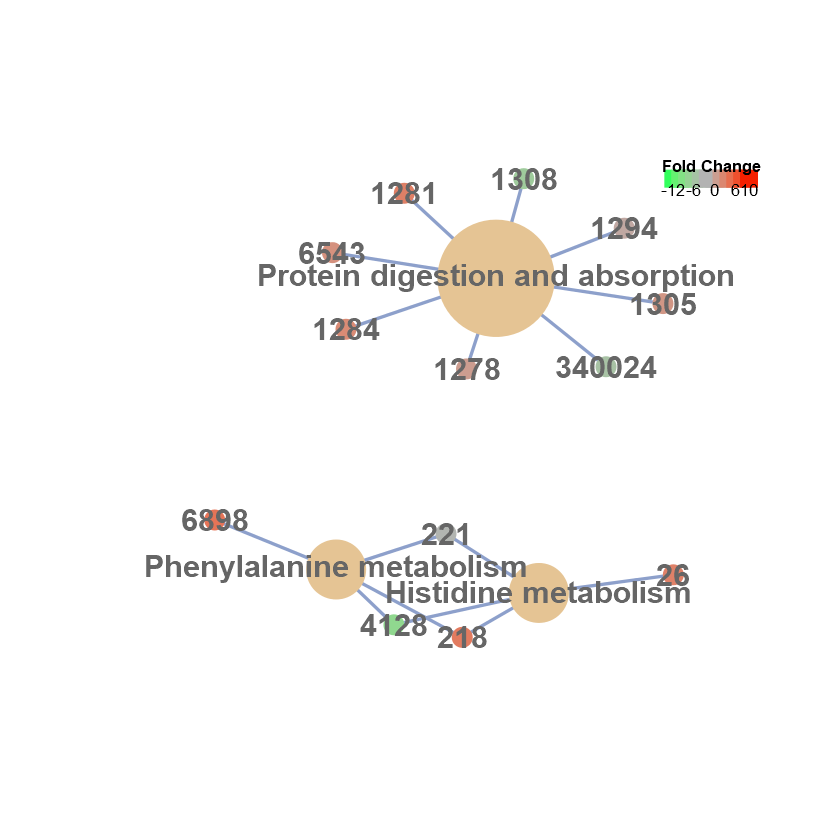

In [51]:
kk <- clusterProfiler::enrichKEGG(gene = gene,
                 organism     = 'hsa',
                 pvalueCutoff = 0.1
                )

cnetplot(kk, categorySize="geneNum", foldChange=geneList)

In [77]:
head(kk)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
hsa00360,hsa00360,Phenylalanine metabolism,4/161,17/7389,0.0004140981,0.07744291,0.07744291,4128/221/218/6898,4
hsa04974,hsa04974,Protein digestion and absorption,8/161,90/7389,0.0007271635,0.07744291,0.07744291,1305/1284/1281/1308/1294/6543/1278/340024,8
hsa00340,hsa00340,Histidine metabolism,4/161,23/7389,0.0013914171,0.09879061,0.09879061,26/4128/221/218,4


In [82]:
clipboard <- read.table("clipboard" , header = TRUE)
head(clipboard)
t1d <- clipboard

t1d
PTPN22
IL10
AFF3
IFIH1
CTLA4
CCR5


In [83]:
clipboard <- read.table("clipboard" , header = TRUE)
head(clipboard)
t2d <- clipboard

TCF7L2
KCNQ1
ENPP1
FTO
PPARG
CDKN2A
CDKN2B


In [88]:
head(reults.anno)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,ENTREZID,SYMBOL
ENSG00000241670,184.05735,-8.224287,1.5099489,-5.446732,5.130365e-08,0.0008174210,P-value<0.05,NA,NA
ENSG00000237198,97.64726,8.792390,1.6552961,5.311672,1.086239e-07,0.0008653526,P-value<0.05,NA,NA
ENSG00000270375,16780.67213,3.662321,0.7231299,5.064540,4.093874e-07,0.0021742566,P-value<0.05,NA,NA
ENSG00000144460,115.10394,4.492508,0.9618233,4.670825,2.999925e-06,0.0095748251,P-value<0.05,57624,NYAP2
ENSG00000230178,115.01179,7.985025,1.7355336,4.600905,4.206601e-06,0.0095748251,P-value<0.05,26683,OR4F3
ENSG00000231649,453.89773,2.761279,0.5980519,4.617123,3.890975e-06,0.0095748251,P-value<0.05,NA,NA


In [90]:
reults.anno %>% filter(SYMBOL %in% t2d) %>% head

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,ENTREZID,SYMBOL


In [91]:
reults.anno %>% filter(SYMBOL == "NYAP2")

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,ENTREZID,SYMBOL
115.1039,4.492508,0.9618233,4.670825,2.999925e-06,0.009574825,P-value<0.05,57624,NYAP2


In [93]:
head(rownames(reults.anno))

[1] "ENSG00000241670" "ENSG00000237198" "ENSG00000270375" "ENSG00000144460"
[5] "ENSG00000230178" "ENSG00000231649"

In [96]:
reults.anno["ENSG00000148737",]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sig,ENTREZID,SYMBOL
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [102]:
resul <- geneAnnotations(input=as.data.frame(res), 
                               keys=rownames(as.data.frame(res)), 
                               column=c("ENTREZID", "SYMBOL"), 
                               keytype="ENSEMBL", organism="human")
write.csv(resul, "insulin-sensitve.deseq2.csv")

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


In [106]:
resul$ENSEMBL <- rownames(resul)

In [103]:
meth <- read_tsv("First_CpG_island_filtered-Avg_by_Island.txt.out")
head(meth)

Parsed with column specification:
cols(
  island = col_character(),
  gene = col_character(),
  after.avg.beta = col_double(),
  before.avg.beta = col_double(),
  after.vs.before.delta.beta = col_double(),
  island.pvalue = col_double(),
  island.fdr = col_double(),
  num.sites = col_integer()
)


island,gene,after.avg.beta,before.avg.beta,after.vs.before.delta.beta,island.pvalue,island.fdr,num.sites
chr1:111215698-111220378,KCNA3,0.8750000,0.05555556,0.8194444,0.01175439,0.1070571,2
chr1:113495898-113500888,SLC16A1,0.8333333,0.09523810,0.7380952,0.02797428,0.1070571,1
chr1:113495898-113500888,SLC16A1-AS1,0.8333333,0.09523810,0.7380952,0.02797428,0.1070571,1
chr1:161494006-161498126,HSPA6,0.8333333,0.00000000,0.8333333,0.03774955,0.1070571,1
chr1:205028938-205033058,AL583832.1,1.0000000,0.11111111,0.8888889,0.01526807,0.1070571,1
chr1:205028938-205033058,CNTN2,1.0000000,0.11111111,0.8888889,0.01526807,0.1070571,1


In [107]:
join.df <- resul %>% full_join(meth, by = c("SYMBOL" = "gene"))
head(join.df)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ENTREZID,SYMBOL,ENSEMBL,island,after.avg.beta,before.avg.beta,after.vs.before.delta.beta,island.pvalue,island.fdr,num.sites
2.653898,-0.244579077,3.3310611,-0.073423774,0.9414689,NA,7105,TSPAN6,ENSG00000000003,NA,NA,NA,NA,NA,NA,NA
279.811530,-0.449252723,0.8253557,-0.544314061,0.5862254,0.9701315,8813,DPM1,ENSG00000000419,NA,NA,NA,NA,NA,NA,NA
208.962627,0.219637609,0.5789578,0.379367201,0.7044152,0.9763186,57147,SCYL3,ENSG00000000457,NA,NA,NA,NA,NA,NA,NA
203.363513,-0.511185971,0.7043966,-0.725707631,0.4680180,0.9625688,55732,C1orf112,ENSG00000000460,NA,NA,NA,NA,NA,NA,NA
5365.952501,0.001748712,0.2692463,0.006494843,0.9948179,0.9999182,2268,FGR,ENSG00000000938,NA,NA,NA,NA,NA,NA,NA
248.856012,-0.206062226,0.8588590,-0.239925547,0.8103880,0.9866694,3075,CFH,ENSG00000000971,NA,NA,NA,NA,NA,NA,NA


In [108]:
write.csv(join.df, "insulin-sensitive.merge.meth.deseq2.csv", row.names=FALSE)